In [1]:
import pandas as pd

data_clsf = pd.read_csv("data/classification_wine_quality.csv")

In [2]:
data_clsf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [3]:
print("""
No. of Columns: {}
No. of Rows: {}
No. of Categorical Columns: {}
No. of Numerical Columns: {}""".format(data_clsf.shape[1],
                                      data_clsf.shape[0],
                                      len(data_clsf.select_dtypes('O').columns),
                                      len(data_clsf.select_dtypes(['int','float']).columns)))


No. of Columns: 12
No. of Rows: 1599
No. of Categorical Columns: 0
No. of Numerical Columns: 11


In [4]:
data_clsf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<Figure size 432x288 with 0 Axes>

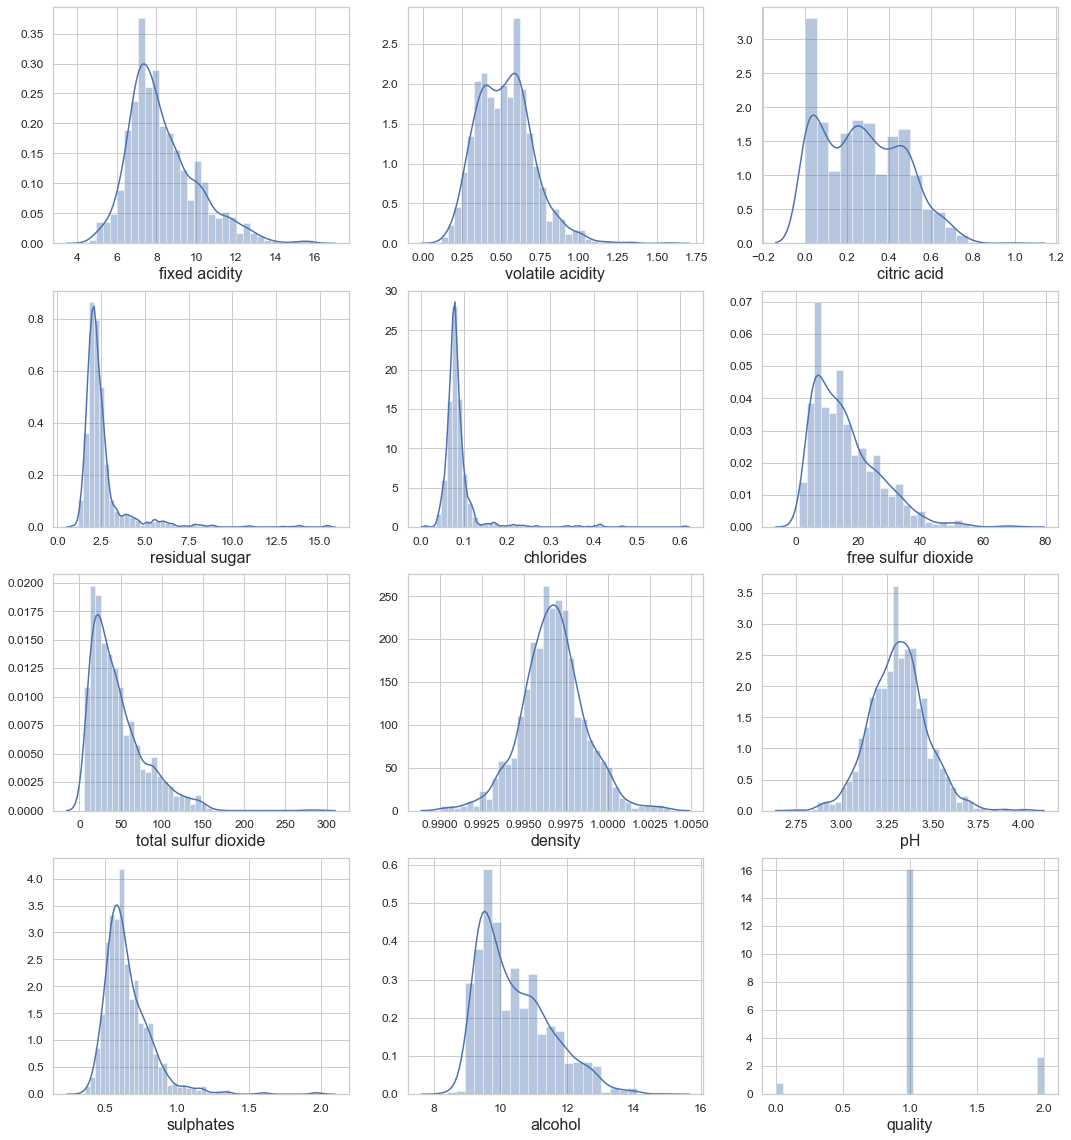

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,20))
    sns.set_style("whitegrid")
    
    for feature in features:
        i += 1
        plt.subplot(row,col,i)
        sns.distplot(data[feature])
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data_clsf, data_clsf.columns)

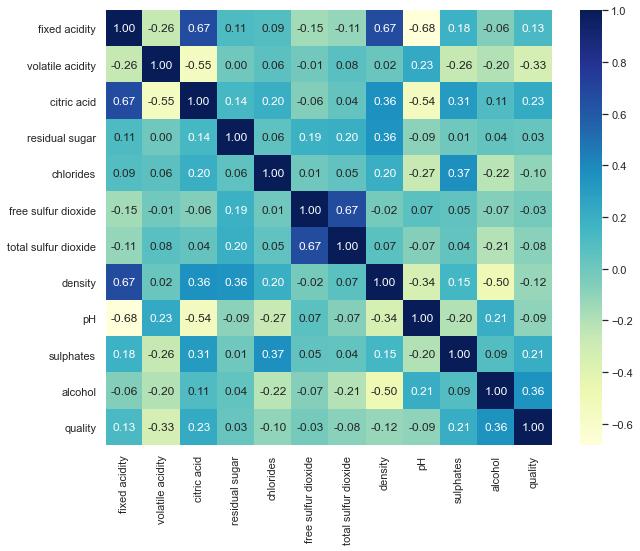

In [6]:
#checking correlations

corr = data_clsf.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True, fmt=".2f", cmap="YlGnBu");


In [7]:
#preprocessing

pd.DataFrame(data_clsf.isnull().sum(), columns=['Missing Values'])

,Missing Values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [8]:
val_counts = data_clsf['quality'].value_counts()
sizes = val_counts.values
labels = val_counts.index

class_dist = pd.DataFrame({'rating':labels,'count':sizes,'percentage': np.round((sizes/sum(sizes))*100, 2)})
class_dist

,rating,count,percentage
0,1,1319,82.49
1,2,217,13.57
2,0,63,3.94


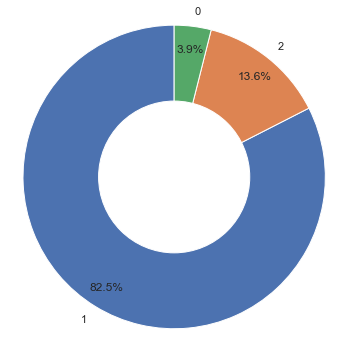

In [9]:
def plot_class_dist(sizes,labels):
    fig1, ax1 = plt.subplots(figsize=(5,5))
    ax1.pie(sizes,
           labels=labels,
           autopct='%1.1f%%',
           startangle=90,
           pctdistance=0.85)
    
    centre_circle = plt.Circle((0,0),0.50,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()

plot_class_dist(sizes,labels);

In [10]:
#data segregation

X = data_clsf.loc[:, data_clsf.columns != 'quality']
y = data_clsf.loc[:, data_clsf.columns == 'quality']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points
""".format(X_train.shape[0],y_train.shape[0],X_test.shape[0],y_test.shape[0]))


X_train has 1279 data points.
y_train has 1279 data points.
X_test has 320 data points.
y_test has 320 data points



In [14]:
#training data using Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(random_state = 1234)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [15]:
#validation

y_pred = clf_model.predict(X_test)

In [16]:
#checking accuracy

from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)

print('The accuracy score is: {}'.format(acc_score))

The accuracy score is: 0.821875


In [17]:
#making predictions on live data

live_data_clsf = pd.DataFrame({
  'fixed acidity': 7.4,
  'volatile acidity': 0.7,
  'citric acid': 0.0,
  'residual sugar': 1.9,
  'chlorides': 0.076,
  'free sulfur dioxide': 11.0,
  'total sulfur dioxide': 34.0,
  'density': 0.9978,
  'pH': 3.51,
  'sulphates': 0.56,
  'alcohol': 9.4
}, index = [0])

live_data_clsf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
y_pred_live = clf_model.predict(live_data_clsf)
print(y_pred_live)

[1]


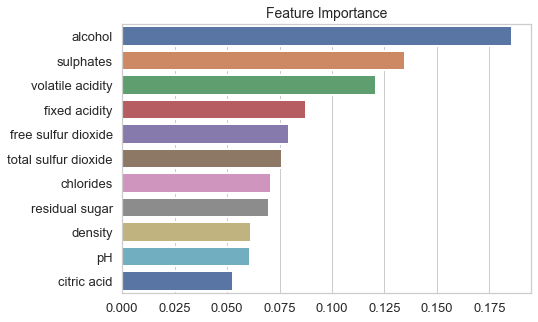

In [20]:
#feature importance

coef = pd.Series(clf_model.feature_importances_, index = X.columns)
imp_coef = coef.sort_values(ascending=False)

def plot_importance(feat_imp, feat_name):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.set(style='darkgrid', context='poster')
    sns.barplot(feat_imp, feat_name, palette='deep')
    plt.title('Feature Importance', fontsize=14)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.tight_layout()
    
plot_importance(imp_coef.values, imp_coef.index)

In [25]:
#visualizing tree

from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(clf_model,
                               feature_names=X_train.columns,
                               out_file=None,
                               filled=True,
                               rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_svg('tree.svg')

True